In [4]:
import pandas as pd
!pip install openpyxl


attacks_df = pd.read_excel("GSAF5.xls")

# GSAF5 =xlrd.open_GSAF5("C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Quest_2")

attacks_df.describe()

,Year,original order
count,7010.000000,6799.000000
mean,1935.271327,3401.152081
std,271.735460,1963.076319
min,0.000000,2.000000
25%,1947.000000,1701.500000
50%,1986.000000,3401.000000
75%,2009.000000,5100.500000
max,2026.000000,6802.000000


In [5]:
attacks_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-04-19 00:00:00,2025.0,Unprovoked,Maldives,Kulhudhuffushi City,Haa Dhaalu atoll,snorkeling,Unknown Male,M,30,...,Not stated,Todd Smith: The edition: https://en.sun.mv/96031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-12 00:00:00,2025.0,Unprovoked,USA,Florida,Everglades National Park Flamingo Lodge Highwa...,Undisclosed,Unknown Male,M,?,...,Not stated,Kevin McMurray Trackingsharks.com: Florida New...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-03-26 00:00:00,2025.0,Unprovoked,Australia,WA,Sandtrax Port Beach North Fremantle Perth,Swimming,Unknown Male,M,30+,...,1.5m Tiger shark,Kevin McMurray Trackingsharks.com: www.surfer....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-10 00:00:00,2025.0,Unprovoked,Australia,WA,Duke of Orleans Bay,Surfing,Steven Jeffrey Payne,M,37,...,Great White Shark,Bob Myatt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-07 00:00:00,2025.0,Unprovoked,Australia,NSW,Gunyah beach Bundeena Port Hacking,Swimming,Mangyong Zhang,F,56,...,Bull shark,Bob Myatt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
attacks_df.shape

(7012, 23)

In [7]:
attacks_clean_df=attacks_df.drop(['pdf', 'href formula' , 'href' , 'Case Number' , 'Case Number.1' , 'original order' , 'Unnamed: 21' , 'Unnamed: 22' , 'Source' , 'Time' , 'Injury' , 'Name' , 'Location' , 'Type' , 'Year'], axis=1)
attacks_clean_df
# Removed columns that we are not using

,Date,Country,State,Activity,Sex,Age,Fatal Y/N,Species
0,2025-04-19 00:00:00,Maldives,Kulhudhuffushi City,snorkeling,M,30,N,Not stated
1,2025-04-12 00:00:00,USA,Florida,Undisclosed,M,?,N,Not stated
2,2025-03-26 00:00:00,Australia,WA,Swimming,M,30+,N,1.5m Tiger shark
3,2025-03-10 00:00:00,Australia,WA,Surfing,M,37,Y,Great White Shark
4,2025-03-07 00:00:00,Australia,NSW,Swimming,F,56,N,Bull shark
...,...,...,...,...,...,...,...,...
7007,Before 1903,AUSTRALIA,Western Australia,Diving,M,NaN,Y,NaN
7008,Before 1903,AUSTRALIA,Western Australia,Pearl diving,M,NaN,Y,NaN
7009,1900-1905,USA,North Carolina,Swimming,M,NaN,Y,NaN
7010,1883-1889,PANAMA,NaN,NaN,M,NaN,Y,NaN


In [8]:
attacks_clean_df.describe()

,Date,Country,State,Activity,Sex,Age,Fatal Y/N,Species
count,7012,6962,6527,6427,6433,4018,6451,3881
unique,6057,242,926,1604,10,249,12,1712
top,1957,USA,Florida,Surfing,M,16,N,White shark
freq,9,2558,1186,1133,5624,92,4883,194


In [9]:
attacks_clean_country=attacks_clean_df["Country"] = attacks_clean_df["Country"].apply(
    lambda aus: "Australia" if str(aus).strip().lower() == "australia" else aus
)



In [10]:
attacks_clean_country=attacks_clean_country["Country"] = attacks_clean_df["Country"].apply(
    lambda us: "USA" if str(us).strip().lower() == "usa" else us
)

# USA and Australia ortography fix

In [11]:
def get_locations(row):
    if row["Country"] == "USA":
        return str(row["Country"]) + "_" + str(row["State"])
    elif row["Country"] == "Australia":
        return str(row["Country"]) + "_" + str(row["State"])
    else:
        return row["Country"]


attacks_clean_df["Country_clean"] = attacks_clean_df.apply(get_locations, axis=1)
attacks_clean_df

# Add the state in USA and Australia to define as "countries"

,Date,Country,State,Activity,Sex,Age,Fatal Y/N,Species,Country_clean
0,2025-04-19 00:00:00,Maldives,Kulhudhuffushi City,snorkeling,M,30,N,Not stated,Maldives
1,2025-04-12 00:00:00,USA,Florida,Undisclosed,M,?,N,Not stated,USA_Florida
2,2025-03-26 00:00:00,Australia,WA,Swimming,M,30+,N,1.5m Tiger shark,Australia_WA
3,2025-03-10 00:00:00,Australia,WA,Surfing,M,37,Y,Great White Shark,Australia_WA
4,2025-03-07 00:00:00,Australia,NSW,Swimming,F,56,N,Bull shark,Australia_NSW
...,...,...,...,...,...,...,...,...,...
7007,Before 1903,Australia,Western Australia,Diving,M,NaN,Y,NaN,Australia_Western Australia
7008,Before 1903,Australia,Western Australia,Pearl diving,M,NaN,Y,NaN,Australia_Western Australia
7009,1900-1905,USA,North Carolina,Swimming,M,NaN,Y,NaN,USA_North Carolina
7010,1883-1889,PANAMA,NaN,NaN,M,NaN,Y,NaN,PANAMA


In [12]:
attacks_clean_df=attacks_clean_df.drop(['Country' , 'State'], axis=1)
attacks_clean_df

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean
0,2025-04-19 00:00:00,snorkeling,M,30,N,Not stated,Maldives
1,2025-04-12 00:00:00,Undisclosed,M,?,N,Not stated,USA_Florida
2,2025-03-26 00:00:00,Swimming,M,30+,N,1.5m Tiger shark,Australia_WA
3,2025-03-10 00:00:00,Surfing,M,37,Y,Great White Shark,Australia_WA
4,2025-03-07 00:00:00,Swimming,F,56,N,Bull shark,Australia_NSW
...,...,...,...,...,...,...,...
7007,Before 1903,Diving,M,NaN,Y,NaN,Australia_Western Australia
7008,Before 1903,Pearl diving,M,NaN,Y,NaN,Australia_Western Australia
7009,1900-1905,Swimming,M,NaN,Y,NaN,USA_North Carolina
7010,1883-1889,NaN,M,NaN,Y,NaN,PANAMA


In [13]:
attacks_clean_df.describe()

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean
count,7012,6427,6433,4018,6451,3881,6962
unique,6057,1604,10,249,12,1712,317
top,1957,Surfing,M,16,N,White shark,USA_Florida
freq,9,1133,5624,92,4883,194,1186


In [14]:
    unique_count = attacks_clean_df["Activity"].nunique()
    print(unique_count)

1604


In [15]:
attacks_clean_df['Activity'] = attacks_clean_df['Activity'].astype(str).str.lower()


def categories(Activity_clean):
    if 'surf' in Activity_clean or 'board' in Activity_clean:
        return 'surfing'
    elif 'wading' in Activity_clean or 'swimming' in Activity_clean or 'standing' in Activity_clean:
        return 'swimming'
    elif 'fishing' in Activity_clean:
        return 'fishing'
    elif 'snork' in Activity_clean:
        return 'snorkeling'
    elif 'diving' in Activity_clean or 'dive' in Activity_clean:
        return 'diving'
    else:
        return 'others'

attacks_clean_df['Activity'] = attacks_clean_df['Activity'].apply(categories)

In [16]:
unique_count = attacks_clean_df["Activity"].nunique()
print(unique_count)

6


In [17]:
attacks_clean_df.describe()

,Date,Activity,Sex,Age,Fatal Y/N,Species,Country_clean
count,7012,7012,6433,4018,6451,3881,6962
unique,6057,6,10,249,12,1712,317
top,1957,surfing,M,16,N,White shark,USA_Florida
freq,9,1781,5624,92,4883,194,1186


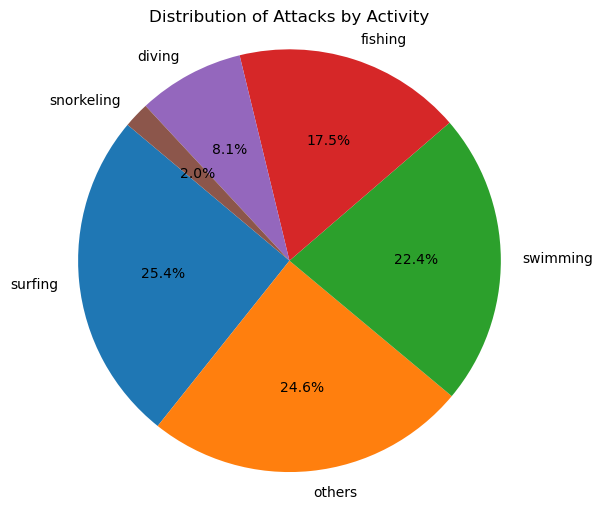

In [20]:
import matplotlib.pyplot as plt


activity_counts = attacks_clean_df['Activity'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attacks by Activity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

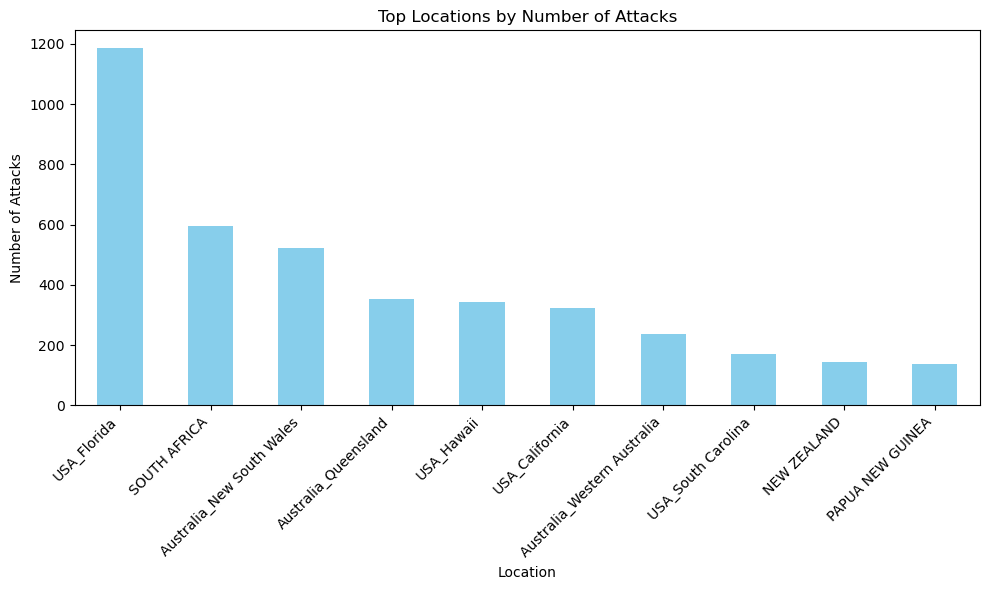

In [19]:
import matplotlib.pyplot as plt

# Group and count the number of attacks by location
location_counts = attacks_clean_df['Country_clean'].value_counts().head(10)  

# Plot as a bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Top Locations by Number of Attacks')
plt.xlabel('Location')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()
plt.show()